## Plot by Demographics

Inspired by https://arxiv.org/abs/2410.19599

In [1]:
import pandas as pd 

In [2]:
Dsim = pd.read_csv("bert_sim_results_gpt4o.csv")

Dsim.head()

,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,0,all_4.jsonl,Text_SubjectiveLit,0.943845,I feel relatively confident in my ability to o...,I'm somewhat confident that I have the capacit...
1,1,0,all_4.jsonl,Text_Anxiety,0.962411,I'm usually most anxious about not being heard...,When I'm extreme sick I'm just anxious about w...
2,2,0,all_4.jsonl,Text_Numeracy,0.980511,"One time, a friend of mine was experiencing pe...","A friend when to the ER for a certain thing, t..."
3,3,0,all_4.jsonl,Text_TrustPhys,0.984867,I generally find it hard to fully trust doctor...,I think they are more concerned about what is ...
4,4,0,conditioning_on_all.jsonl,Text_SubjectiveLit,0.947121,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...


In [3]:
from utils import *
EXPERIMENT_TYPE = 'Demographic + Behavioral + Psychological'
file_path = 'Data/Data_SurveyPlusDemographics.txt'
data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

# Data preprocess
data, psychological_list = convert_to_natural_language(data)
data, fipi_columns = split_fipi_responses(data)
data.drop(columns=['FIPI_response'], inplace=True, errors='ignore')
psychological_list.extend(fipi_columns)


train_data = select_experiment_data(data, EXPERIMENT_TYPE)
train_data = process_data_based_on_experiment(train_data, EXPERIMENT_TYPE)

# add labels column
label_columns = ['Text_SubjectiveLit', 'Text_Anxiety', 'Text_Numeracy', 'Text_TrustPhys']
train_data = pd.concat([train_data, data[label_columns]], axis=1)

C:\Users\howar\AppData\Local\Temp\ipykernel_20668\1438049294.py:4: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')
c:\Users\howar\OneDrive\Documents\GitHub\psych-agent-llm\utils.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(clean_numeric)
c:\Users\howar\OneDrive\Documents\GitHub\psych-agent-llm\utils.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [4]:
train_data.head()

,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,HC_1,HC_2,...,HC_5,FIPI_1_response,FIPI_2_response,FIPI_3_response,FIPI_4_response,FIPI_5_response,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You strongly agree that you are agreeable and ...,You strongly agree that you are dependable and...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a..."
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,Agree,Agree,...,Agree,You unknown that you are extraverted and enthu...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You strongly agree that you are emotionally st...,You agree that you are open to experience and ...,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ..."
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,Neutral,Neutral,...,Neutral,You strongly agree that you are extraverted an...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You unknown that you are emotionally stable an...,You unknown that you are open to experience an...,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,Neutral,Neutral,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi..."
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,Agree,Agree,...,Neutral,You disagree that you are extraverted and enth...,You unknown that you are agreeable and kind.,You unknown that you are dependable and organi...,You agree that you are emotionally stable and ...,You unknown that you are open to experience an...,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...


In [5]:
train_data.columns

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'Dmed_7', 'Dmed_8', 'HC_1', 'HC_2',
       'HC_3', 'HC_4', 'HC_5', 'FIPI_1_response', 'FIPI_2_response',
       'FIPI_3_response', 'FIPI_4_response', 'FIPI_5_response',
       'Text_SubjectiveLit', 'Text_Anxiety', 'Text_Numeracy',
       'Text_TrustPhys'],
      dtype='object')

In [6]:
Dtrain = train_data[["D1", "D2","D3","D4","D5","D6","Dmed_7","Dmed_8","Text_SubjectiveLit", "Text_Anxiety", "Text_Numeracy","Text_TrustPhys"]]
Dtrain["id"] = Dtrain.index

Dtrain.head()

C:\Users\howar\AppData\Local\Temp\ipykernel_20668\3733813787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dtrain["id"] = Dtrain.index


,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_SubjectiveLit,Text_Anxiety,Text_Numeracy,Text_TrustPhys,id
0,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...,"With some health care providers in the past, I...",A friend had been given antibiotic eye drops f...,"She never seems rushed with me, and she will a...",0
1,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,I feel like I can understand 90% of what is be...,I worry that I won't get the full attention of...,Just normal doctor visits and testing. not wo...,"My doctor wants to give his all, but the time ...",1
2,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,I feel that while I am not a health expert I d...,I do not like to wait for test results to say ...,I tried to use my math skills the best that I ...,I like that the dr takes the time to listen an...,2
3,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,I feel fairly confident that when I see medica...,The thing that makes me most anxious is wonder...,"I studied athletic training in college, and I'...","Typically when I see a doctor, they are a medi...",3
4,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,"I am okay with it for the most part, but I of...",I just get nervous having to sit in doctor's o...,Every time I researched my symptoms myself and...,I trust my doctor because he is highly trained...,4


In [7]:
Dtrainlong = pd.wide_to_long(Dtrain, "Text_", i="id", j="topic", suffix="\D+").reset_index()

Dtrainlong["topic"] = "Text_" + Dtrainlong["topic"].astype(str)

In [8]:
Dtrainlong.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_
0,0,Text_SubjectiveLit,21.0,2.0,1.0,6.0,1.0,1.0,30.0,152,I believe that I understand most of what my he...
1,1,Text_SubjectiveLit,22.0,2.0,1.0,4.0,3.0,1.0,29.0,150,I feel like I can understand 90% of what is be...
2,2,Text_SubjectiveLit,33.0,2.0,1.0,6.0,6.0,1.0,32.0,160,I feel that while I am not a health expert I d...
3,3,Text_SubjectiveLit,17.0,2.0,1.0,5.0,6.0,1.0,31.0,168,I feel fairly confident that when I see medica...
4,4,Text_SubjectiveLit,17.0,1.0,1.0,4.0,1.0,1.0,34.0,220,"I am okay with it for the most part, but I of..."


In [9]:
Dsim.head()

,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,0,0,all_4.jsonl,Text_SubjectiveLit,0.943845,I feel relatively confident in my ability to o...,I'm somewhat confident that I have the capacit...
1,1,0,all_4.jsonl,Text_Anxiety,0.962411,I'm usually most anxious about not being heard...,When I'm extreme sick I'm just anxious about w...
2,2,0,all_4.jsonl,Text_Numeracy,0.980511,"One time, a friend of mine was experiencing pe...","A friend when to the ER for a certain thing, t..."
3,3,0,all_4.jsonl,Text_TrustPhys,0.984867,I generally find it hard to fully trust doctor...,I think they are more concerned about what is ...
4,4,0,conditioning_on_all.jsonl,Text_SubjectiveLit,0.947121,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...


In [10]:
D = Dtrainlong.merge(Dsim, left_on=["topic","Text_"], right_on=["Question","True Label"])

D.head()


,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,Text_,Unnamed: 0,Sample Index,Condition,Question,Similarity,Generated Response,True Label
0,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,I'm somewhat confident that I have the capacit...,0,0,all_4.jsonl,Text_SubjectiveLit,0.943845,I feel relatively confident in my ability to o...,I'm somewhat confident that I have the capacit...
1,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,I'm somewhat confident that I have the capacit...,4,0,conditioning_on_all.jsonl,Text_SubjectiveLit,0.947121,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...
2,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,I'm somewhat confident that I have the capacit...,8,0,holdout_Text_Anxiety.jsonl,Text_SubjectiveLit,0.943129,"I feel moderately capable of obtaining, proces...",I'm somewhat confident that I have the capacit...
3,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,I'm somewhat confident that I have the capacit...,12,0,holdout_Text_Numeracy.jsonl,Text_SubjectiveLit,0.940734,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...
4,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,I'm somewhat confident that I have the capacit...,16,0,holdout_Text_SubjectiveLit.jsonl,Text_SubjectiveLit,0.962086,I feel like I'm pretty capable when it comes t...,I'm somewhat confident that I have the capacit...


In [11]:
# Set up the demographics based on our paper
#D["Age_bin"] = (D["D1"] <= 38).astype(int)
D["Age"] = (D["D1"] <= 32).astype(int)

D["Gender"] = (D["D2"] == 1).astype(int)
D["Race"] = (D["D3"] == 1).astype(int)
D["Education"] = (D["D4"] >= 5).astype(int)
D["Income"] = (D["D5"] >= 4).astype(int)

D.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,...,Condition,Question,Similarity,Generated Response,True Label,Age,Gender,Race,Education,Income
0,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,all_4.jsonl,Text_SubjectiveLit,0.943845,I feel relatively confident in my ability to o...,I'm somewhat confident that I have the capacit...,1,0,0,1,0
1,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,conditioning_on_all.jsonl,Text_SubjectiveLit,0.947121,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...,1,0,0,1,0
2,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,holdout_Text_Anxiety.jsonl,Text_SubjectiveLit,0.943129,"I feel moderately capable of obtaining, proces...",I'm somewhat confident that I have the capacit...,1,0,0,1,0
3,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,holdout_Text_Numeracy.jsonl,Text_SubjectiveLit,0.940734,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...,1,0,0,1,0
4,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,holdout_Text_SubjectiveLit.jsonl,Text_SubjectiveLit,0.962086,I feel like I'm pretty capable when it comes t...,I'm somewhat confident that I have the capacit...,1,0,0,1,0


In [12]:
D["Condition"] = D["Condition"].str.replace("json_datasets_200/", "")
D["Condition"] = D["Condition"].str.replace(".jsonl", "")
D["Condition"] = D["Condition"].str.replace("_Text_Anxiety", "")
D["Condition"] = D["Condition"].str.replace("_Text_Numeracy", "")
D["Condition"] = D["Condition"].str.replace("_Text_SubjectiveLit", "")
D["Condition"] = D["Condition"].str.replace("_Text_TrustPhys", "")
D.head()

,id,topic,D1,D2,D3,D4,D5,D6,Dmed_7,Dmed_8,...,Condition,Question,Similarity,Generated Response,True Label,Age,Gender,Race,Education,Income
0,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,all_4,Text_SubjectiveLit,0.943845,I feel relatively confident in my ability to o...,I'm somewhat confident that I have the capacit...,1,0,0,1,0
1,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,conditioning_on_all,Text_SubjectiveLit,0.947121,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...,1,0,0,1,0
2,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,holdout,Text_SubjectiveLit,0.943129,"I feel moderately capable of obtaining, proces...",I'm somewhat confident that I have the capacit...,1,0,0,1,0
3,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,holdout,Text_SubjectiveLit,0.940734,I feel fairly confident in my ability to obtai...,I'm somewhat confident that I have the capacit...,1,0,0,1,0
4,457,Text_SubjectiveLit,8.0,2.0,2.0,5.0,2.0,1.0,24.0,184,...,holdout,Text_SubjectiveLit,0.962086,I feel like I'm pretty capable when it comes t...,I'm somewhat confident that I have the capacit...,1,0,0,1,0


In [13]:
D.Age.describe()

count    960.000000
mean       0.766667
std        0.423173
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Age, dtype: float64

In [14]:
import scipy.stats as stats
def perform_stat_test(data, group_var, value_var, test_type='t-test'):
    groups = data[group_var].unique()
    if len(groups) != 2:
        raise ValueError("Group variable must have exactly two unique values for this test.")
    group1 = data[data[group_var] == groups[0]][value_var]
    group2 = data[data[group_var] == groups[1]][value_var]
    if test_type == 't-test':
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        raise ValueError("Invalid test type specified.")
    return stat, p_value

results = []

for question in D['Question'].unique():
    for condition in D['Condition'].unique():
        subset = D[(D['Question'] == question) & (D['Condition'] == condition)]
        if subset.empty:
            continue
        try:
            stat, p_value = perform_stat_test(subset, 'Age', 'Similarity', test_type='t-test')
            significant = p_value < 0.05  # Significance threshold
            results.append({
                'Question': question,
                'Condition': condition,
                'Test': 't-test',
                'Statistic': stat,
                'p-value': p_value,
                'Significant': significant
            })
        except ValueError as e:
            print(f"Error for Question {question}, Condition {condition}: {e}")


results_df = pd.DataFrame(results)
results_df

,Question,Condition,Test,Statistic,p-value,Significant
0,Text_SubjectiveLit,all_4,t-test,-1.183717,0.249856,False
1,Text_SubjectiveLit,conditioning_on_all,t-test,-1.295089,0.213283,False
2,Text_SubjectiveLit,holdout,t-test,-1.075906,0.285908,False
3,Text_SubjectiveLit,Baseline Zero Shot,t-test,-1.543884,0.136438,False
4,Text_SubjectiveLit,no_system_prompt,t-test,-1.624872,0.116864,False
5,Text_Anxiety,all_4,t-test,1.285716,0.240476,False
6,Text_Anxiety,conditioning_on_all,t-test,1.157666,0.280477,False
7,Text_Anxiety,holdout,t-test,3.154672,0.003257,True
8,Text_Anxiety,Baseline Zero Shot,t-test,2.003892,0.078417,False
9,Text_Anxiety,no_system_prompt,t-test,1.386318,0.201622,False


C:\Users\howar\AppData\Local\Temp\ipykernel_20668\3331570191.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], title='Race', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


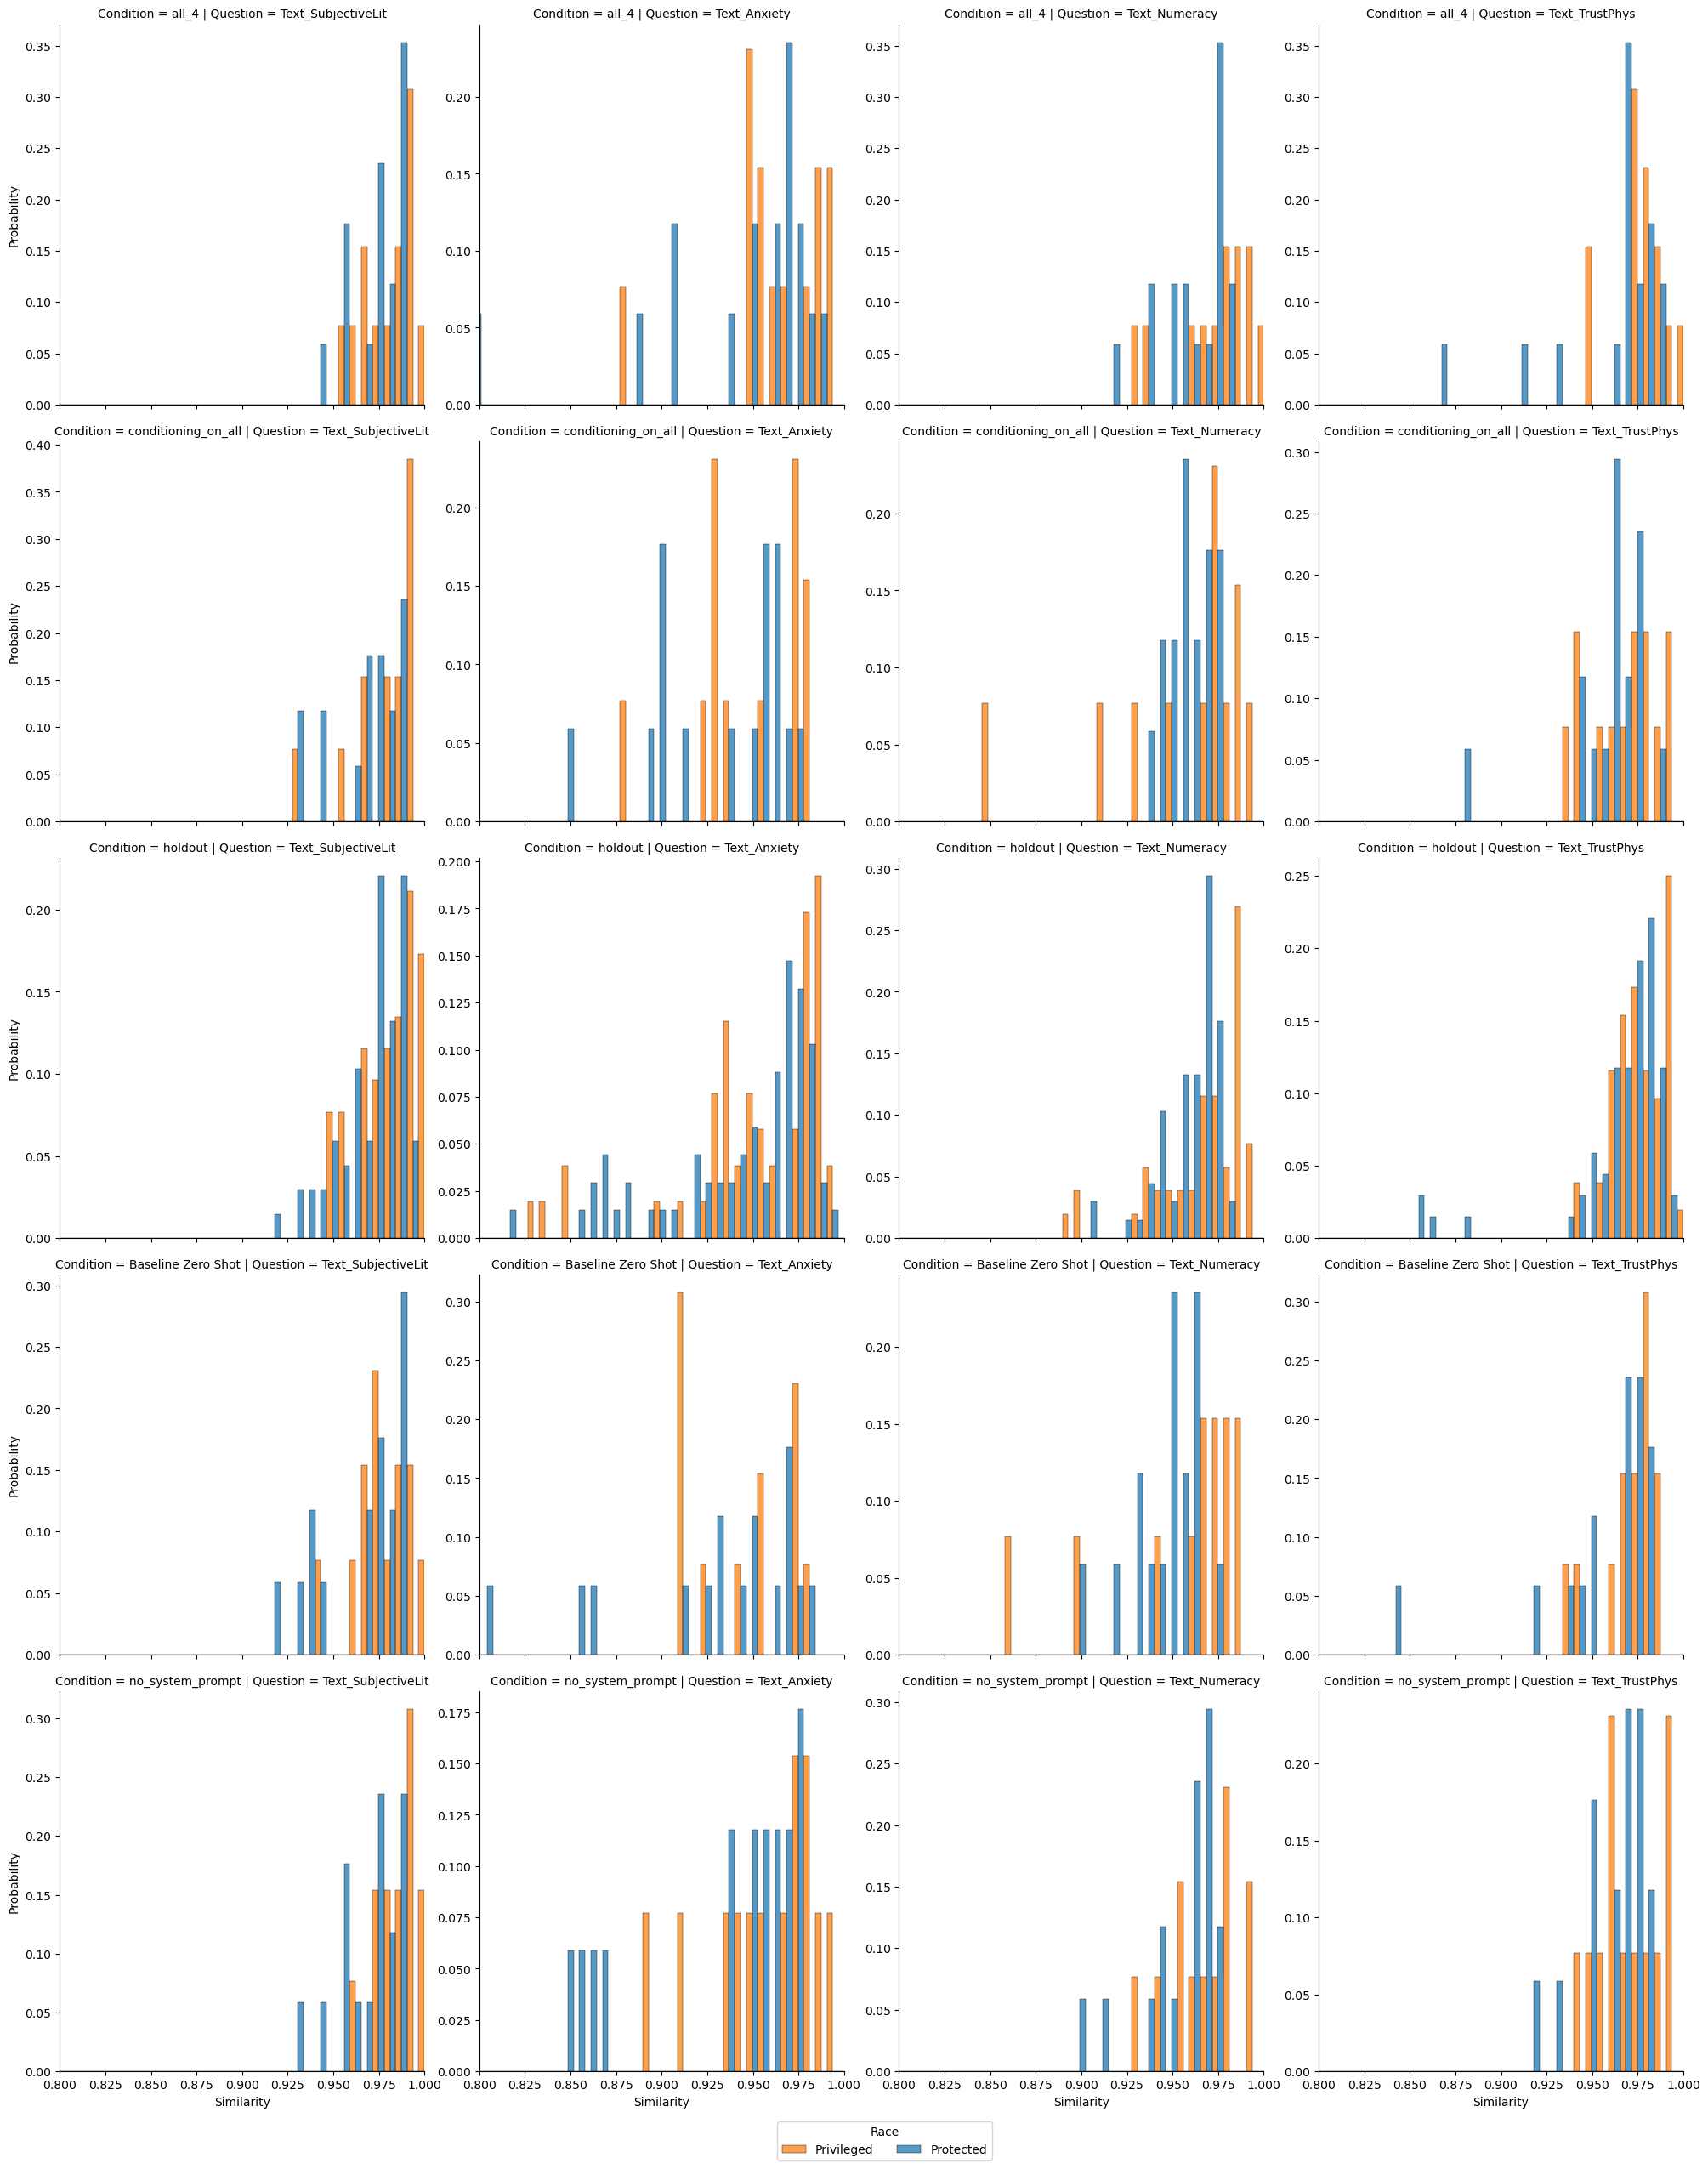

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation



sns.displot(
    D, x="Similarity", hue="Race", col="Question", 
    row="Condition", kind="hist", bins=50, 
    stat="probability", 
    multiple='dodge', shrink=1, 
    common_norm=False,
    facet_kws=dict(sharey=False),
    legend=False,
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Race', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)



In [16]:
import scipy.stats as stats
def perform_stat_test(data, group_var, value_var, test_type='t-test'):
    groups = data[group_var].unique()
    if len(groups) != 2:
        raise ValueError("Group variable must have exactly two unique values for this test.")
    group1 = data[data[group_var] == groups[0]][value_var]
    group2 = data[data[group_var] == groups[1]][value_var]
    if test_type == 't-test':
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        raise ValueError("Invalid test type specified.")
    return stat, p_value

results = []

for question in D['Question'].unique():
    for condition in D['Condition'].unique():
        subset = D[(D['Question'] == question) & (D['Condition'] == condition)]
        if subset.empty:
            continue
        try:
            stat, p_value = perform_stat_test(subset, 'Race', 'Similarity', test_type='t-test')
            significant = p_value < 0.05  # Significance threshold
            results.append({
                'Question': question,
                'Condition': condition,
                'Test': 't-test',
                'Statistic': stat,
                'p-value': p_value,
                'Significant': significant
            })
        except ValueError as e:
            print(f"Error for Question {question}, Condition {condition}: {e}")


results_df = pd.DataFrame(results)
results_df

,Question,Condition,Test,Statistic,p-value,Significant
0,Text_SubjectiveLit,all_4,t-test,-0.372049,0.712874,False
1,Text_SubjectiveLit,conditioning_on_all,t-test,-0.993450,0.329403,False
2,Text_SubjectiveLit,holdout,t-test,-1.170045,0.244443,False
3,Text_SubjectiveLit,Baseline Zero Shot,t-test,-0.763661,0.451512,False
4,Text_SubjectiveLit,no_system_prompt,t-test,-2.057850,0.049080,True
5,Text_Anxiety,all_4,t-test,-0.849905,0.402725,False
6,Text_Anxiety,conditioning_on_all,t-test,-0.142281,0.888014,False
7,Text_Anxiety,holdout,t-test,-1.000183,0.319273,False
8,Text_Anxiety,Baseline Zero Shot,t-test,-0.104429,0.917607,False
9,Text_Anxiety,no_system_prompt,t-test,-1.128189,0.268963,False


C:\Users\howar\AppData\Local\Temp\ipykernel_20668\834092141.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], title='Age', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


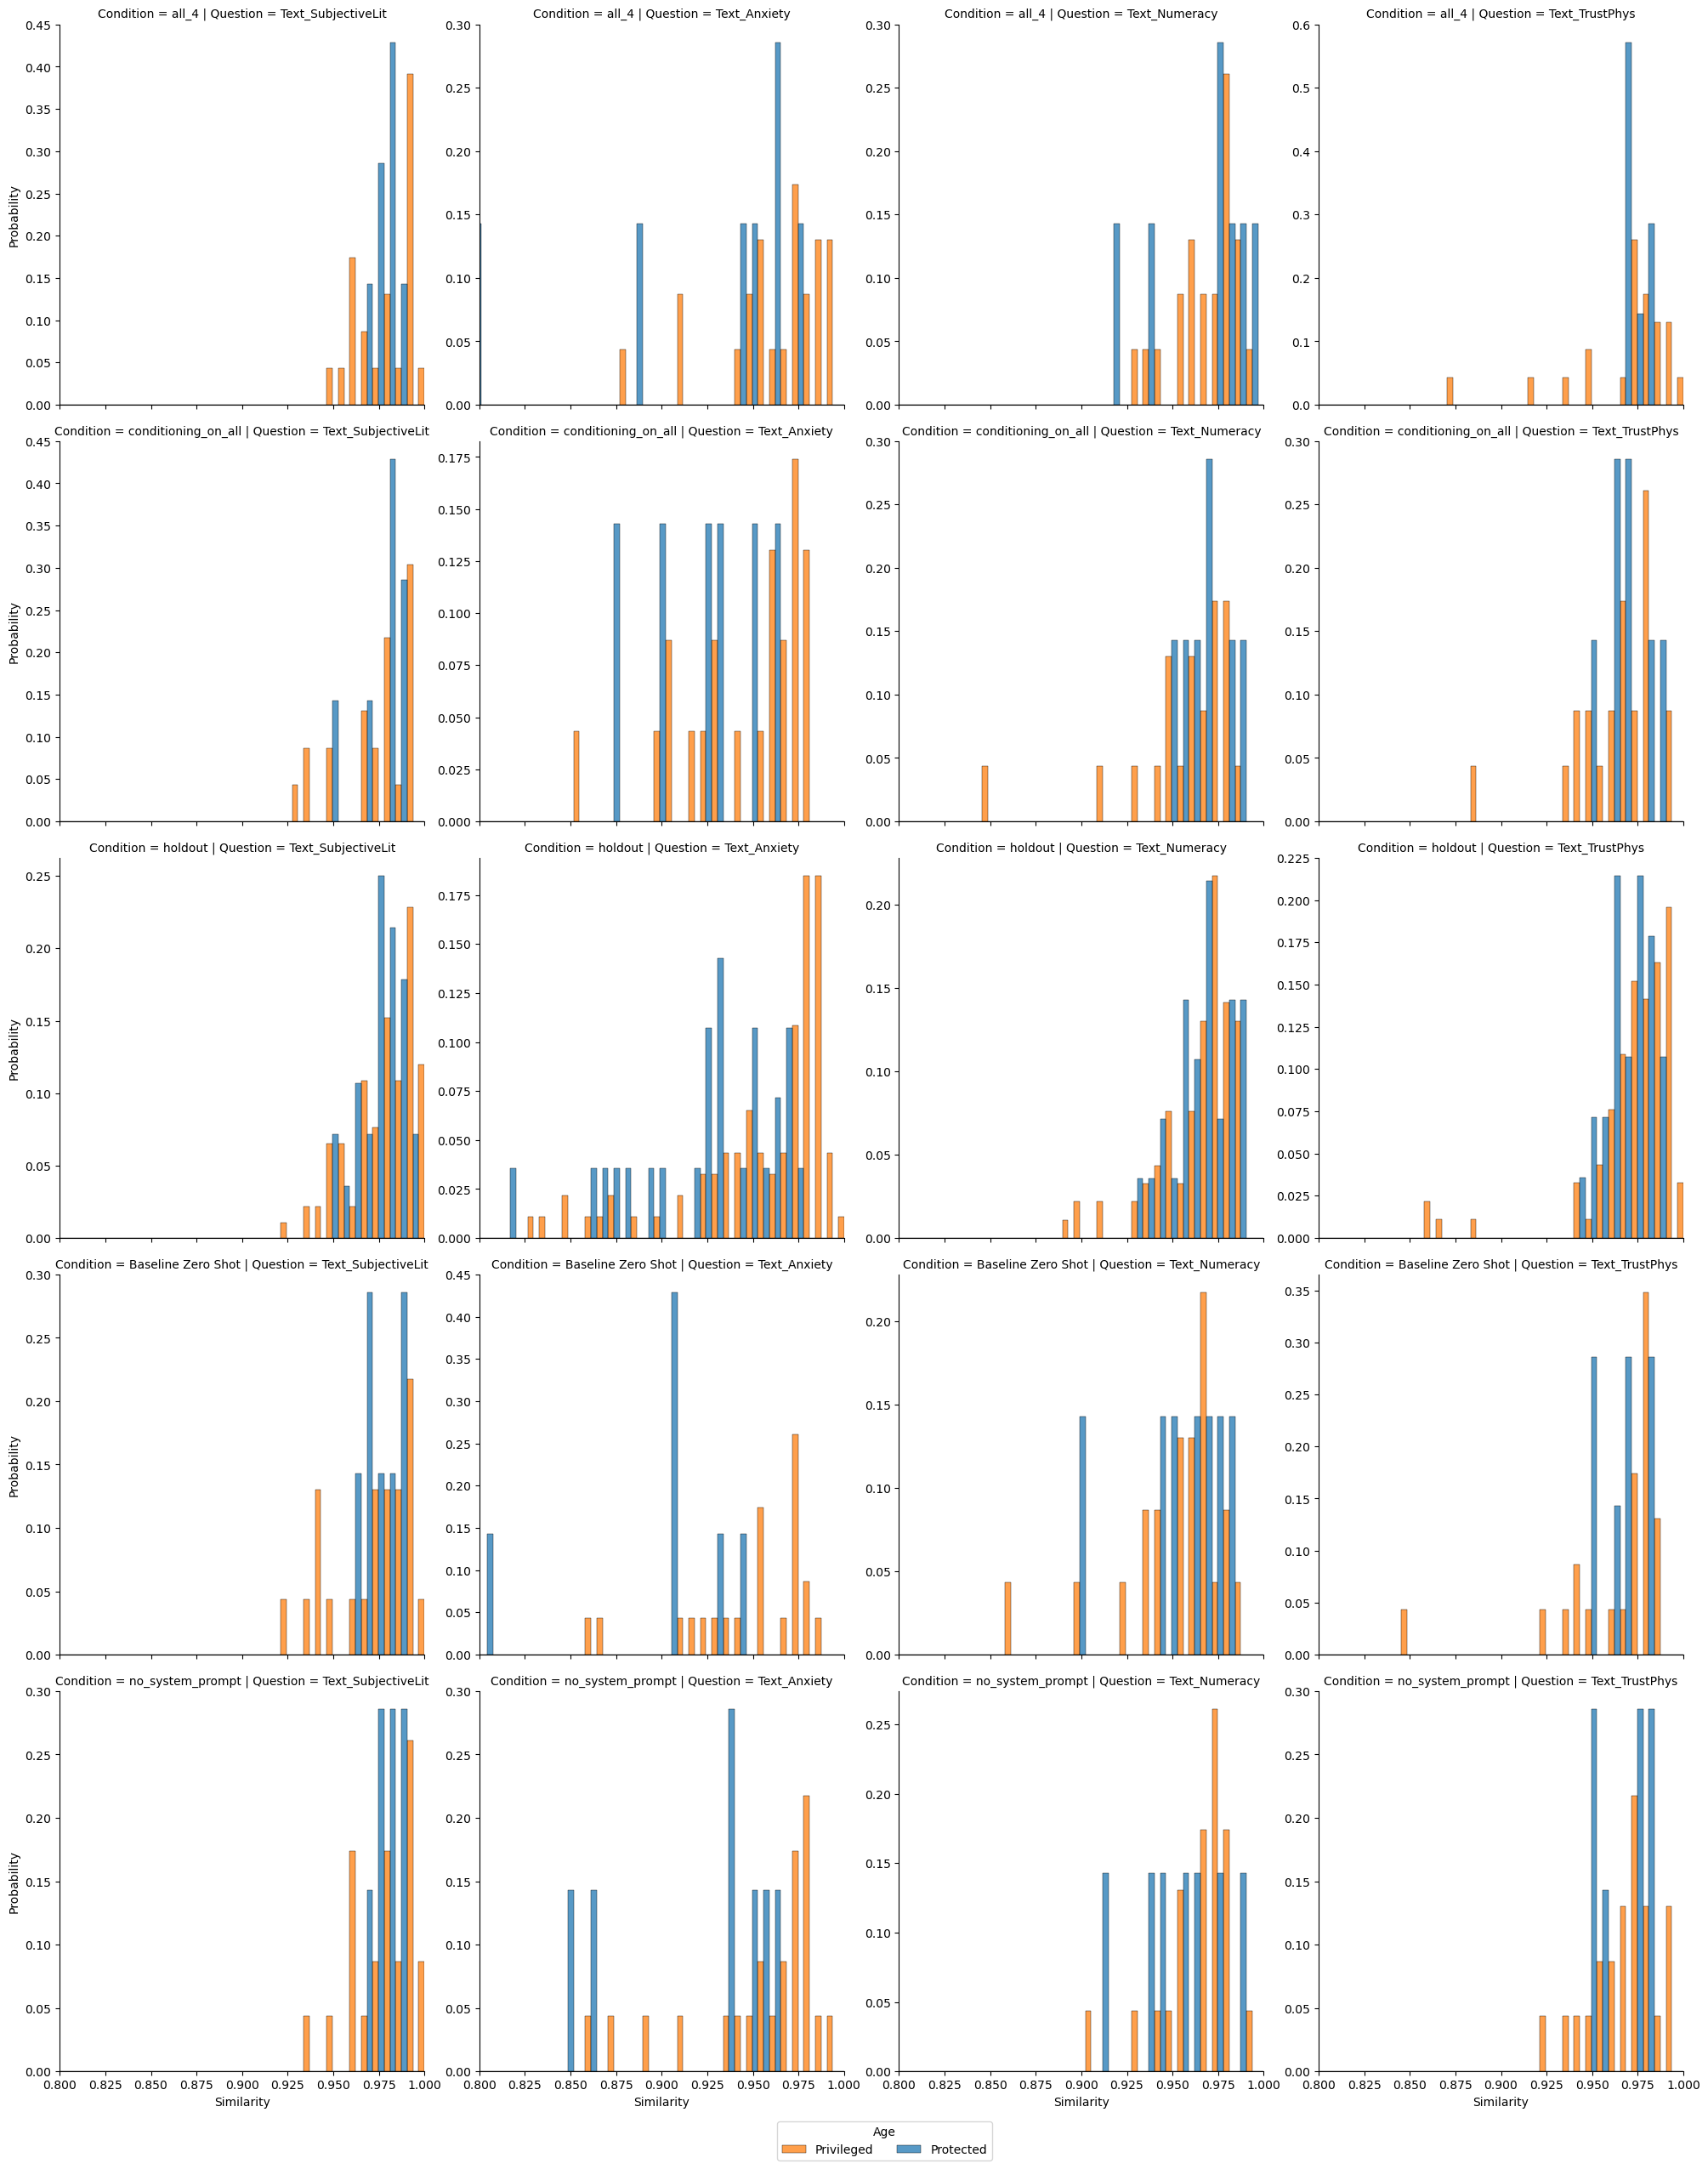

In [17]:
sns.displot(
    D, x="Similarity", hue="Age", col="Question", 
    row="Condition", kind="hist", bins=50, 
    stat="probability", 
    multiple='dodge', shrink=1, 
    common_norm=False,
    facet_kws=dict(sharey=False),
    legend=False,
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Age', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


In [18]:
import scipy.stats as stats
def perform_stat_test(data, group_var, value_var, test_type='t-test'):
    groups = data[group_var].unique()
    if len(groups) != 2:
        raise ValueError("Group variable must have exactly two unique values for this test.")
    group1 = data[data[group_var] == groups[0]][value_var]
    group2 = data[data[group_var] == groups[1]][value_var]
    if test_type == 't-test':
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        raise ValueError("Invalid test type specified.")
    return stat, p_value

results = []

for question in D['Question'].unique():
    for condition in D['Condition'].unique():
        subset = D[(D['Question'] == question) & (D['Condition'] == condition)]
        if subset.empty:
            continue
        try:
            stat, p_value = perform_stat_test(subset, 'Age', 'Similarity', test_type='t-test')
            significant = p_value < 0.05  # Significance threshold
            results.append({
                'Question': question,
                'Condition': condition,
                'Test': 't-test',
                'Statistic': stat,
                'p-value': p_value,
                'Significant': significant
            })
        except ValueError as e:
            print(f"Error for Question {question}, Condition {condition}: {e}")


results_df = pd.DataFrame(results)
results_df

,Question,Condition,Test,Statistic,p-value,Significant
0,Text_SubjectiveLit,all_4,t-test,-1.183717,0.249856,False
1,Text_SubjectiveLit,conditioning_on_all,t-test,-1.295089,0.213283,False
2,Text_SubjectiveLit,holdout,t-test,-1.075906,0.285908,False
3,Text_SubjectiveLit,Baseline Zero Shot,t-test,-1.543884,0.136438,False
4,Text_SubjectiveLit,no_system_prompt,t-test,-1.624872,0.116864,False
5,Text_Anxiety,all_4,t-test,1.285716,0.240476,False
6,Text_Anxiety,conditioning_on_all,t-test,1.157666,0.280477,False
7,Text_Anxiety,holdout,t-test,3.154672,0.003257,True
8,Text_Anxiety,Baseline Zero Shot,t-test,2.003892,0.078417,False
9,Text_Anxiety,no_system_prompt,t-test,1.386318,0.201622,False


C:\Users\howar\AppData\Local\Temp\ipykernel_20668\2035089817.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], title='Gender', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


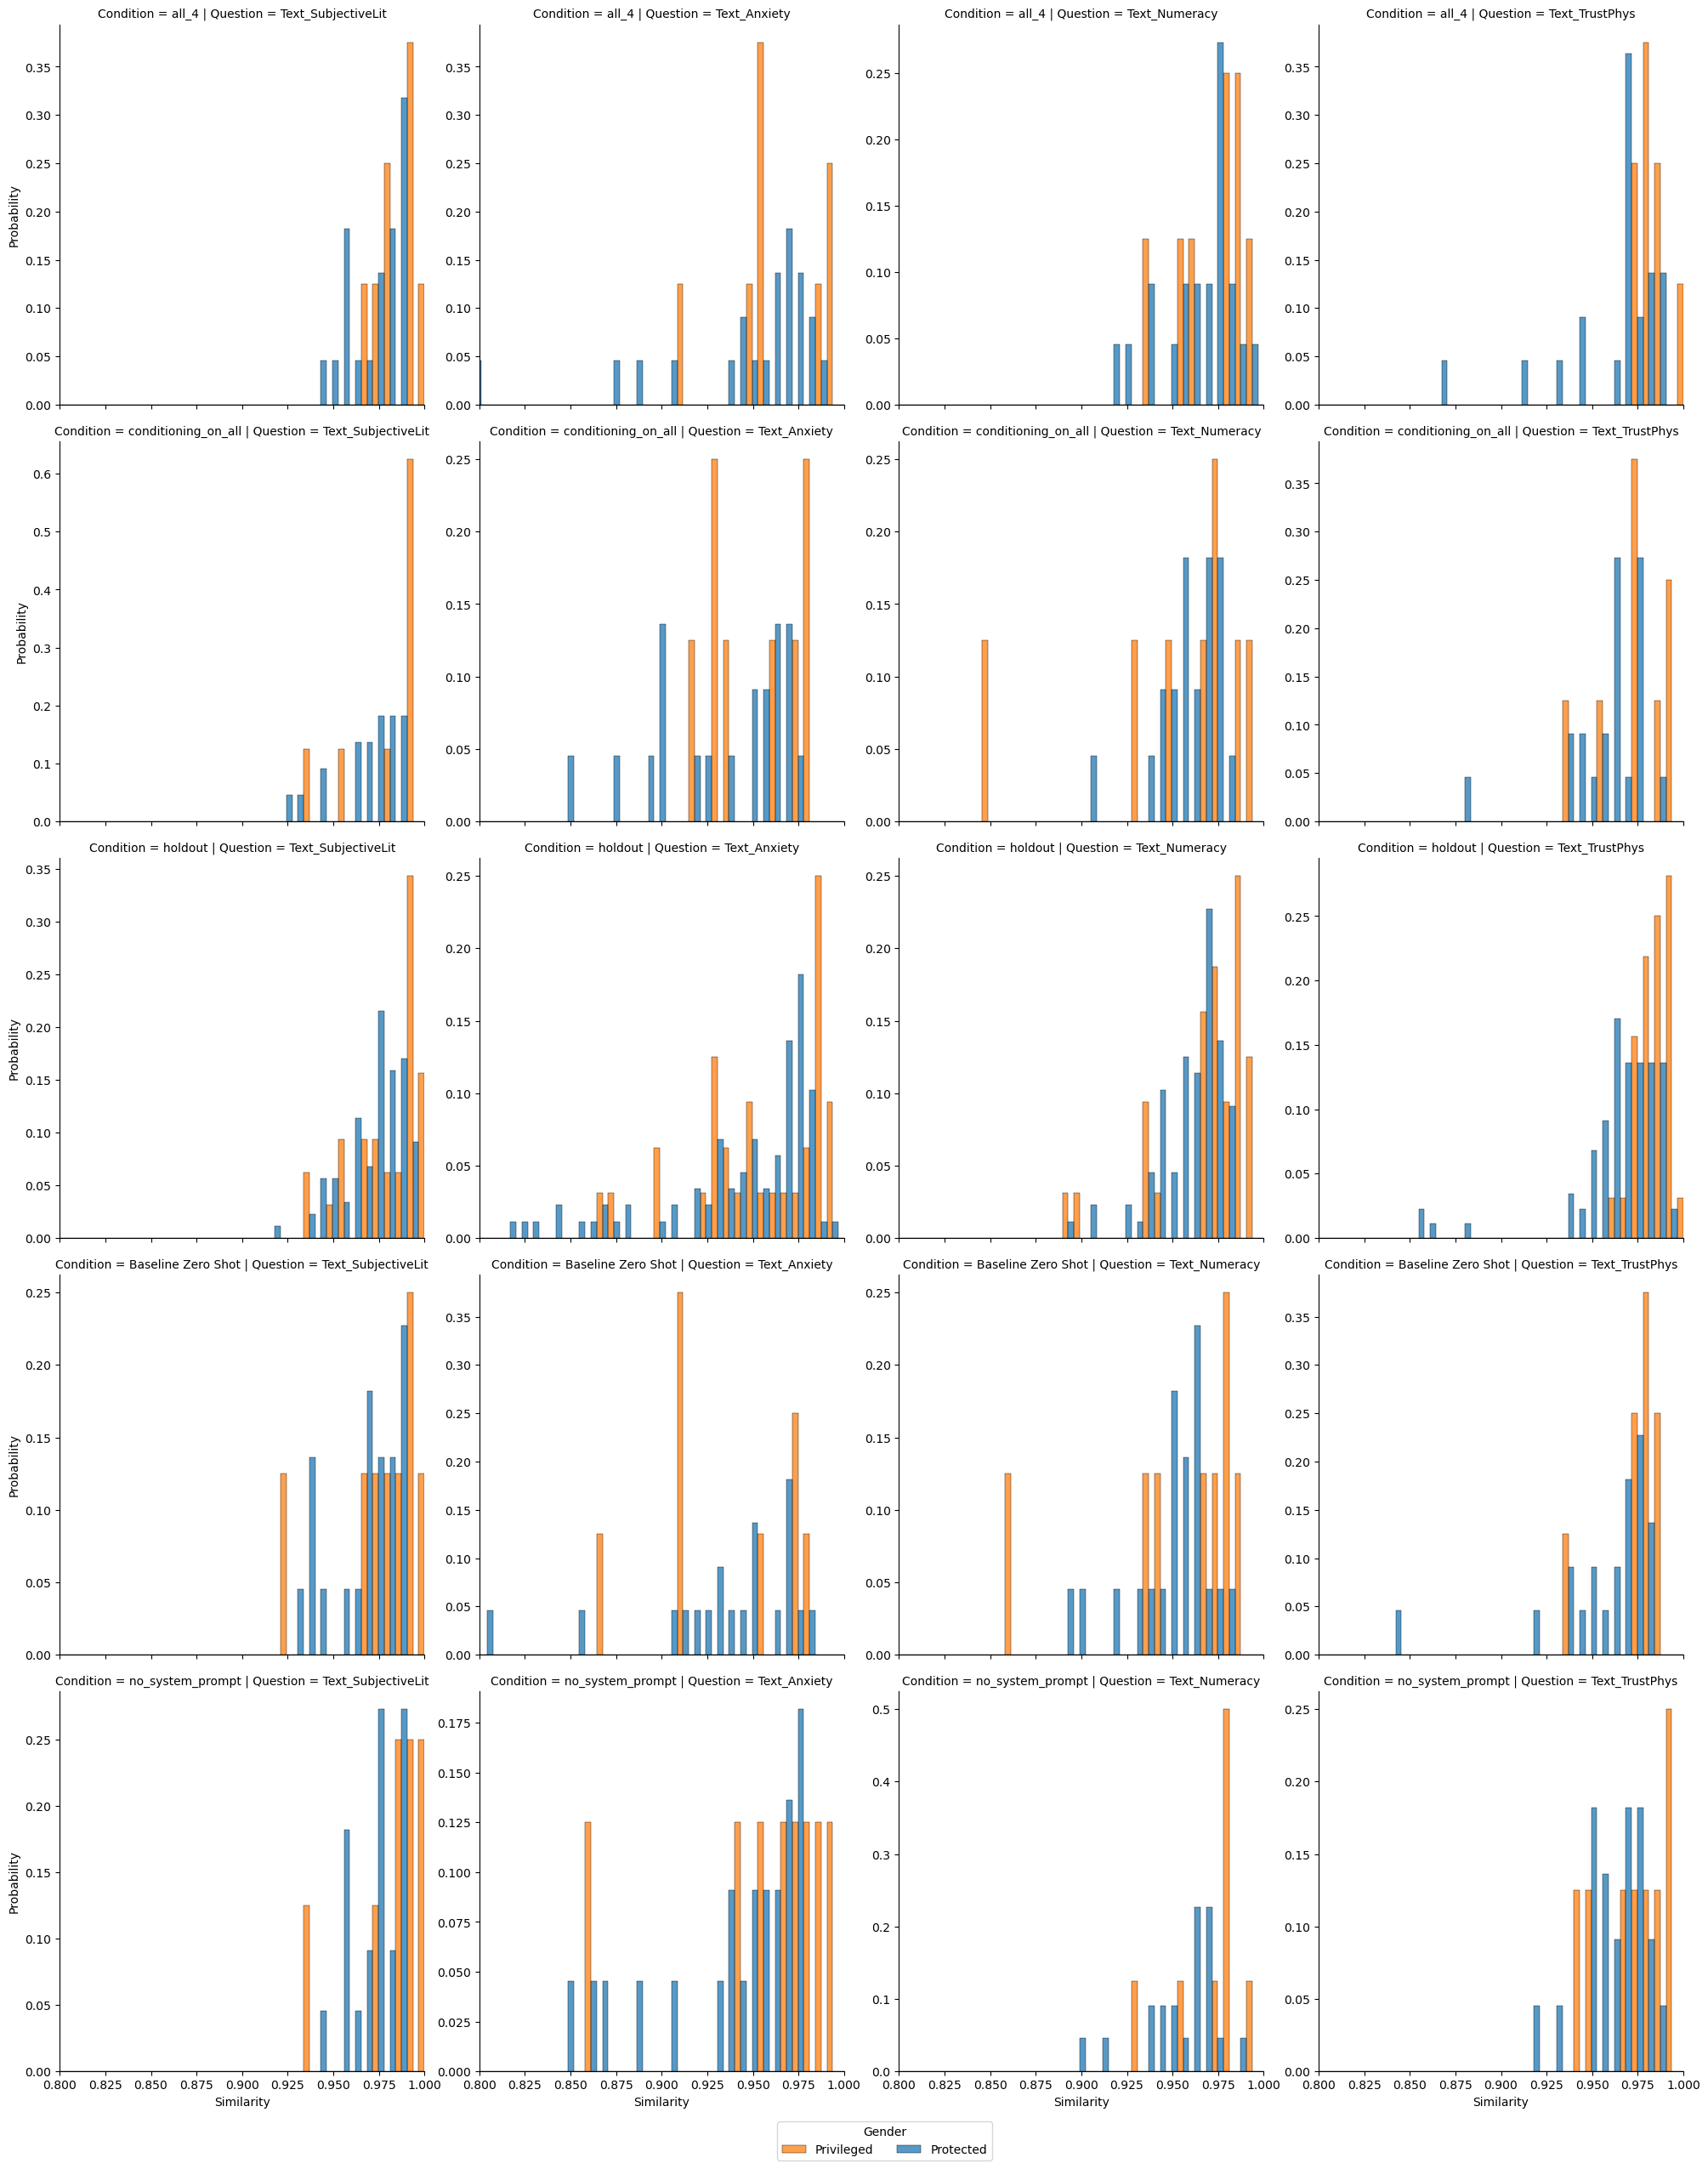

In [19]:
sns.displot(
    D, x="Similarity", hue="Gender", col="Question", 
    row="Condition", kind="hist", bins=50, 
    stat="probability", 
    multiple='dodge', shrink=1, 
    common_norm=False,
    facet_kws=dict(sharey=False),
    legend=False,
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Gender', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


In [20]:
import scipy.stats as stats
def perform_stat_test(data, group_var, value_var, test_type='t-test'):
    groups = data[group_var].unique()
    if len(groups) != 2:
        raise ValueError("Group variable must have exactly two unique values for this test.")
    group1 = data[data[group_var] == groups[0]][value_var]
    group2 = data[data[group_var] == groups[1]][value_var]
    if test_type == 't-test':
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        raise ValueError("Invalid test type specified.")
    return stat, p_value

results = []

for question in D['Question'].unique():
    for condition in D['Condition'].unique():
        subset = D[(D['Question'] == question) & (D['Condition'] == condition)]
        if subset.empty:
            continue
        try:
            stat, p_value = perform_stat_test(subset, 'Gender', 'Similarity', test_type='t-test')
            significant = p_value < 0.05  # Significance threshold
            results.append({
                'Question': question,
                'Condition': condition,
                'Test': 't-test',
                'Statistic': stat,
                'p-value': p_value,
                'Significant': significant
            })
        except ValueError as e:
            print(f"Error for Question {question}, Condition {condition}: {e}")


results_df = pd.DataFrame(results)
results_df

,Question,Condition,Test,Statistic,p-value,Significant
0,Text_SubjectiveLit,all_4,t-test,-1.390250,0.182637,False
1,Text_SubjectiveLit,conditioning_on_all,t-test,-0.673606,0.515238,False
2,Text_SubjectiveLit,holdout,t-test,-0.609577,0.545017,False
3,Text_SubjectiveLit,Baseline Zero Shot,t-test,-0.486051,0.636870,False
4,Text_SubjectiveLit,no_system_prompt,t-test,-0.694023,0.504523,False
5,Text_Anxiety,all_4,t-test,-0.701878,0.490620,False
6,Text_Anxiety,conditioning_on_all,t-test,-1.673794,0.105385,False
7,Text_Anxiety,holdout,t-test,-1.102438,0.273829,False
8,Text_Anxiety,Baseline Zero Shot,t-test,-0.460142,0.650245,False
9,Text_Anxiety,no_system_prompt,t-test,-0.663252,0.519878,False


C:\Users\howar\AppData\Local\Temp\ipykernel_20668\96540991.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], title='Education', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


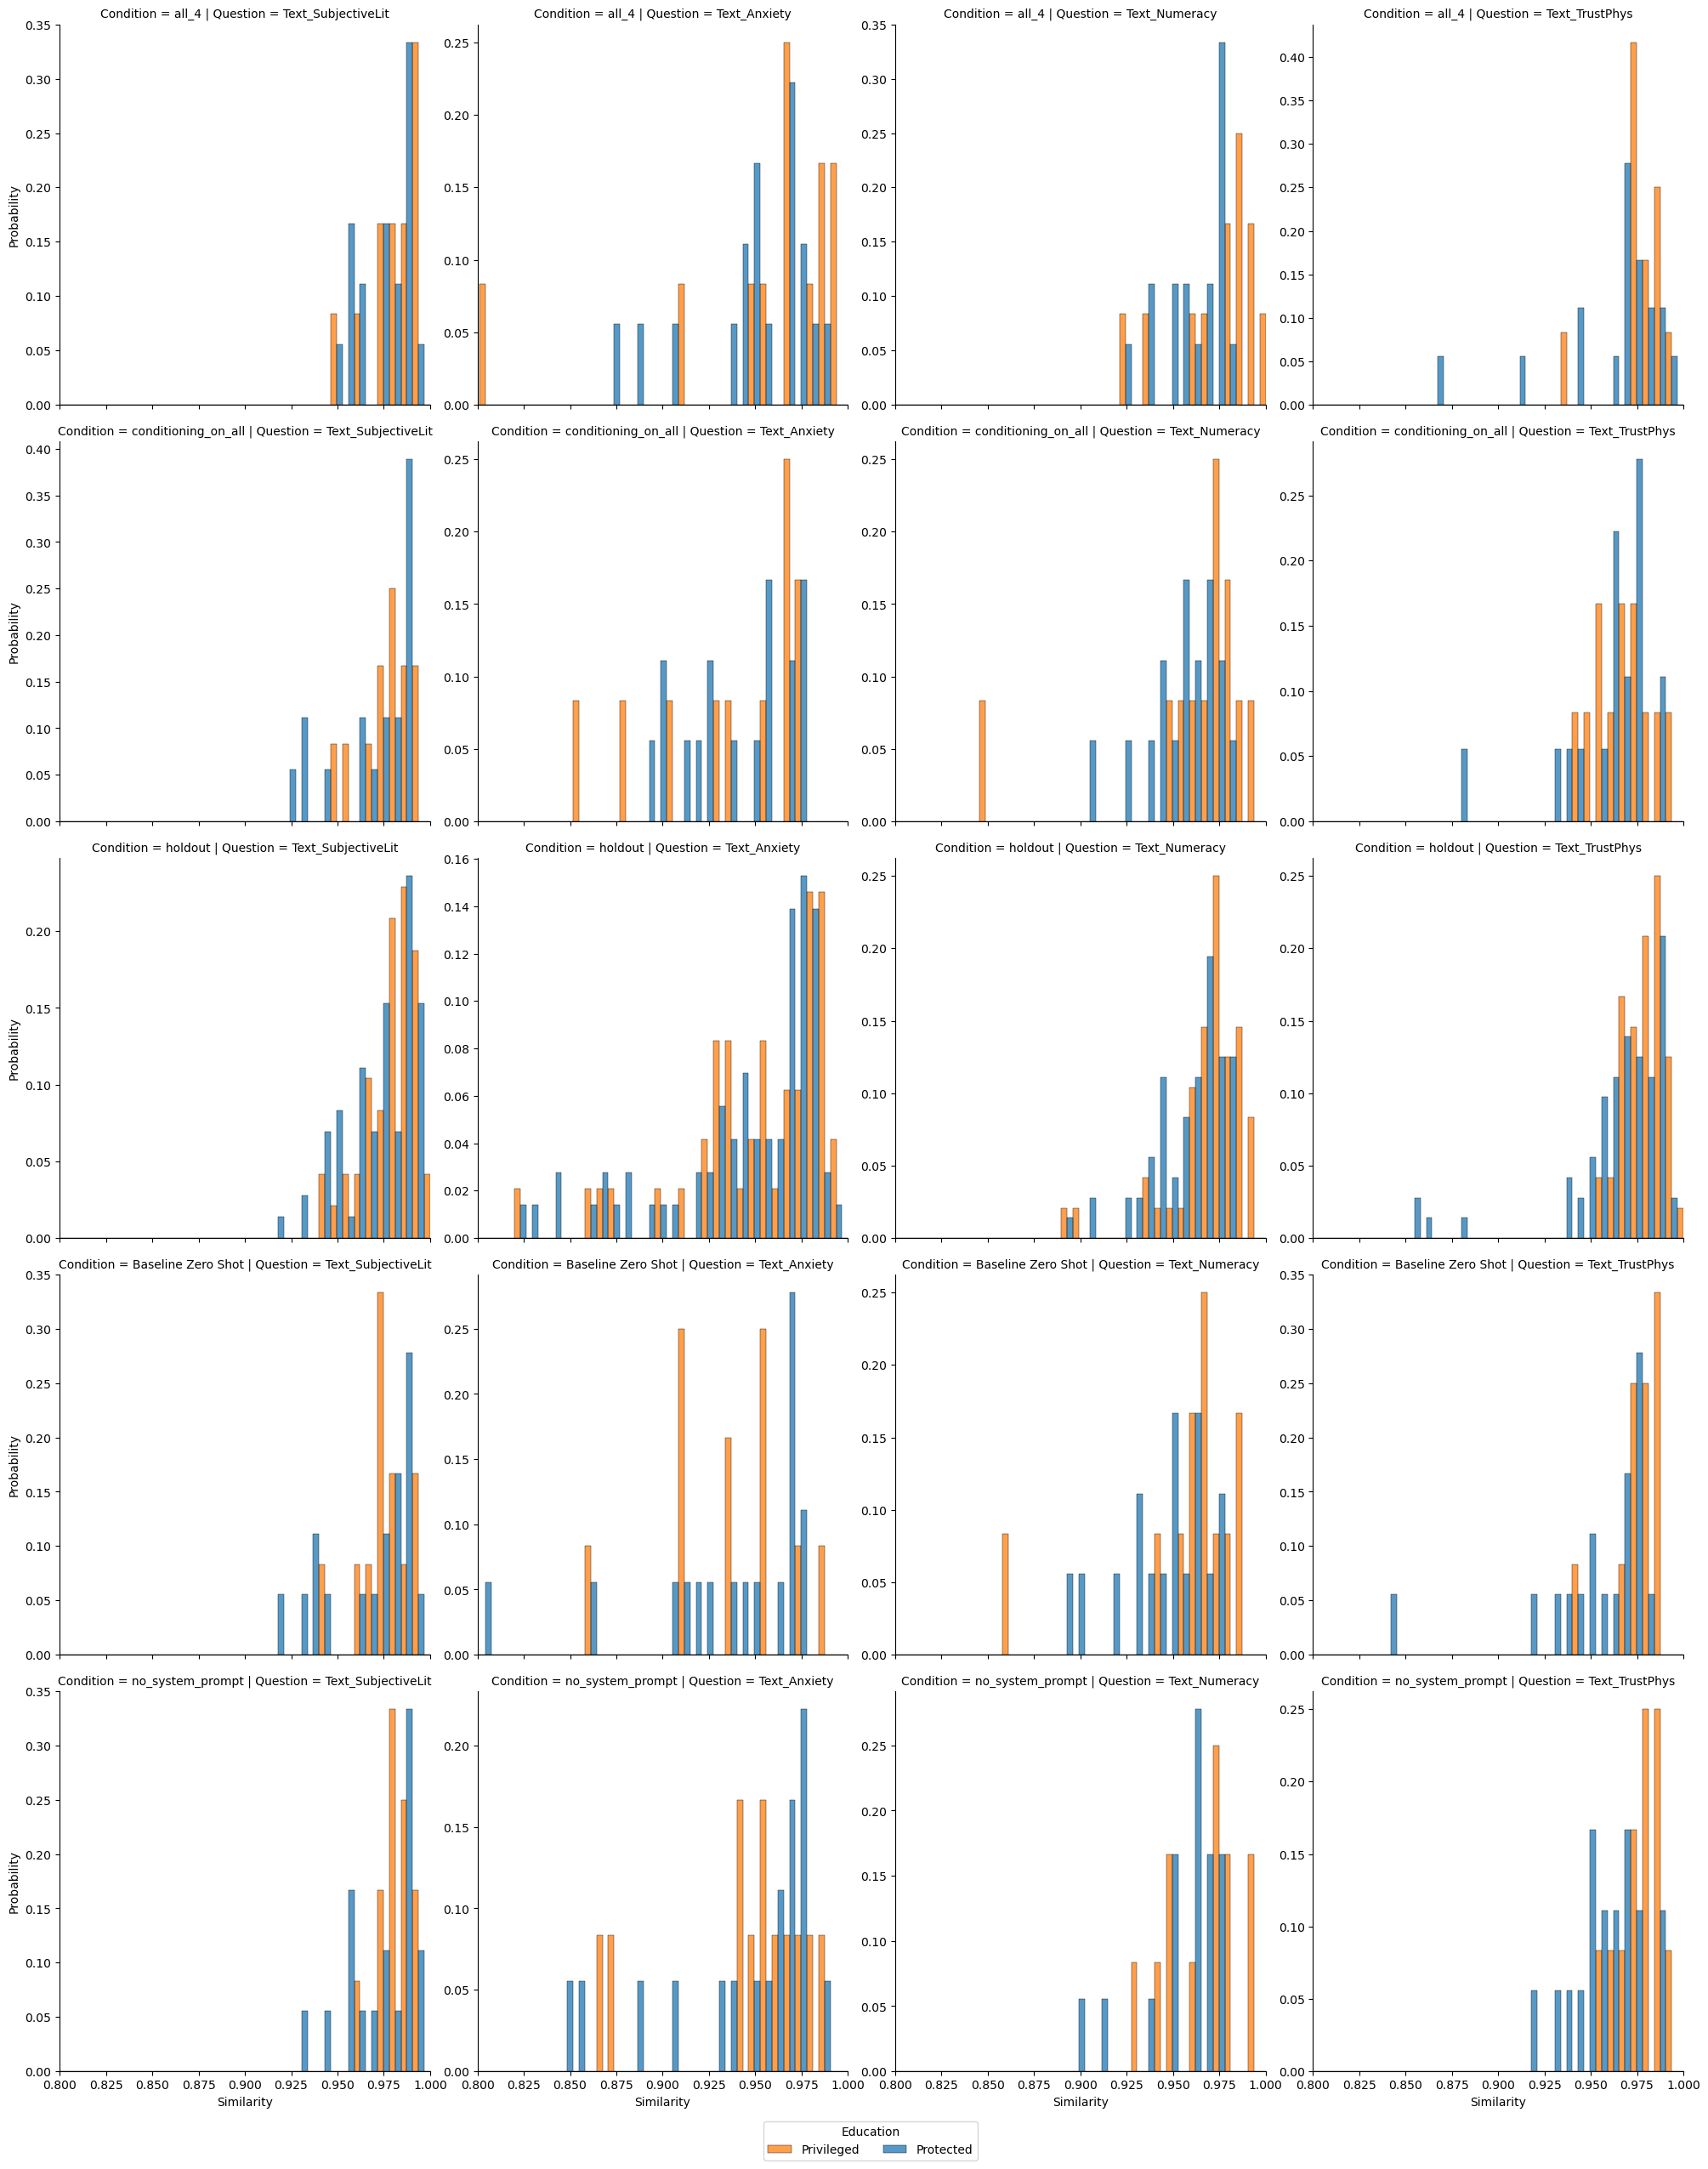

In [21]:
sns.displot(
    D, x="Similarity", hue="Education", col="Question", 
    row="Condition", kind="hist", bins=50, 
    stat="probability", 
    multiple='dodge', shrink=1, 
    common_norm=False,
    facet_kws=dict(sharey=False),
    legend=False,
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Education', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


In [22]:
import scipy.stats as stats
def perform_stat_test(data, group_var, value_var, test_type='t-test'):
    groups = data[group_var].unique()
    if len(groups) != 2:
        raise ValueError("Group variable must have exactly two unique values for this test.")
    group1 = data[data[group_var] == groups[0]][value_var]
    group2 = data[data[group_var] == groups[1]][value_var]
    if test_type == 't-test':
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        raise ValueError("Invalid test type specified.")
    return stat, p_value

results = []

for question in D['Question'].unique():
    for condition in D['Condition'].unique():
        subset = D[(D['Question'] == question) & (D['Condition'] == condition)]
        if subset.empty:
            continue
        try:
            stat, p_value = perform_stat_test(subset, 'Education', 'Similarity', test_type='t-test')
            significant = p_value < 0.05  # Significance threshold
            results.append({
                'Question': question,
                'Condition': condition,
                'Test': 't-test',
                'Statistic': stat,
                'p-value': p_value,
                'Significant': significant
            })
        except ValueError as e:
            print(f"Error for Question {question}, Condition {condition}: {e}")


results_df = pd.DataFrame(results)
results_df

,Question,Condition,Test,Statistic,p-value,Significant
0,Text_SubjectiveLit,all_4,t-test,-0.043634,0.965586,False
1,Text_SubjectiveLit,conditioning_on_all,t-test,0.409557,0.685275,False
2,Text_SubjectiveLit,holdout,t-test,0.355016,0.723218,False
3,Text_SubjectiveLit,Baseline Zero Shot,t-test,0.243871,0.809134,False
4,Text_SubjectiveLit,no_system_prompt,t-test,0.807751,0.426566,False
5,Text_Anxiety,all_4,t-test,-0.016991,0.986649,False
6,Text_Anxiety,conditioning_on_all,t-test,-0.558962,0.582247,False
7,Text_Anxiety,holdout,t-test,-0.682494,0.496751,False
8,Text_Anxiety,Baseline Zero Shot,t-test,-0.345675,0.732484,False
9,Text_Anxiety,no_system_prompt,t-test,-0.159629,0.874451,False


C:\Users\howar\AppData\Local\Temp\ipykernel_20668\2959827387.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0,1], title='Income', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


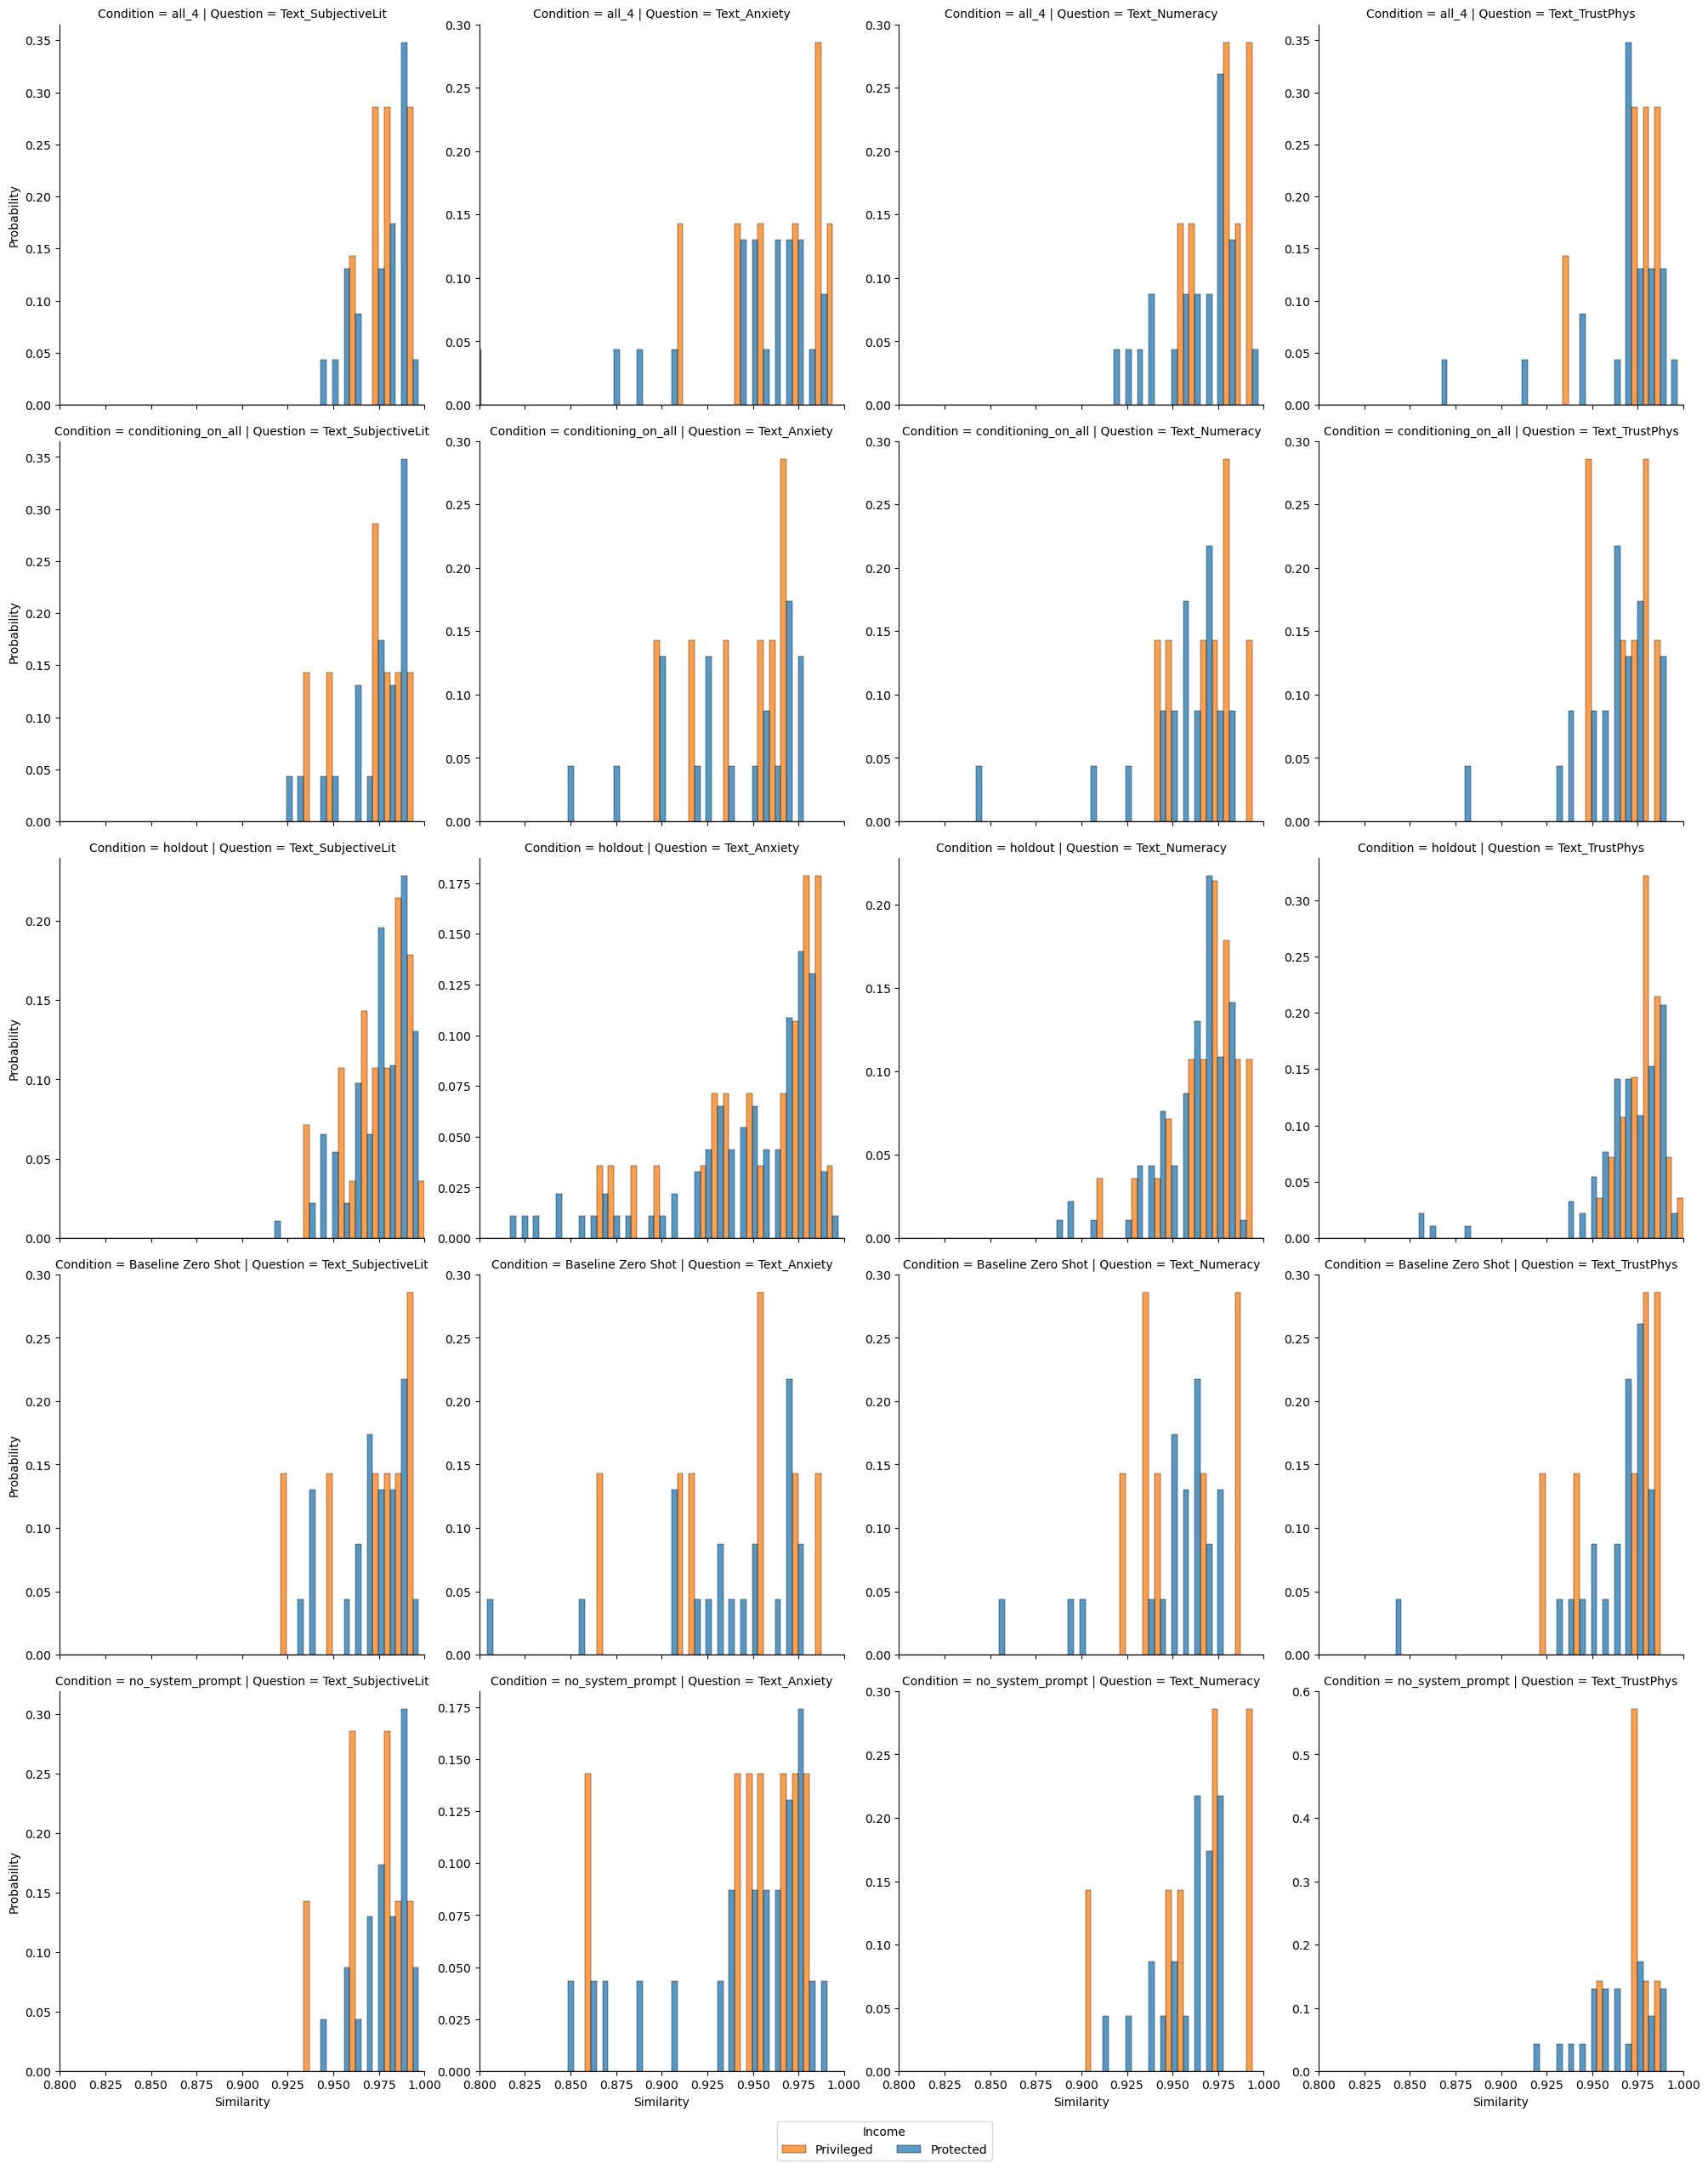

In [23]:
sns.displot(
    D, x="Similarity", hue="Income", col="Question", 
    row="Condition", kind="hist", bins=50, 
    stat="probability", 
    multiple='dodge', shrink=1, 
    common_norm=False,
    facet_kws=dict(sharey=False),
    legend=False,
)
plt.xlim(0.8, 1.0)
plt.legend([0,1], title='Income', loc='lower left', labels=['Privileged', "Protected"], bbox_to_anchor=(-1.5, -0.25), ncol=2)


In [24]:
import scipy.stats as stats
def perform_stat_test(data, group_var, value_var, test_type='t-test'):
    groups = data[group_var].unique()
    if len(groups) != 2:
        raise ValueError("Group variable must have exactly two unique values for this test.")
    group1 = data[data[group_var] == groups[0]][value_var]
    group2 = data[data[group_var] == groups[1]][value_var]
    mean1 = group1.mean()
    mean2 = group2.mean()
    if test_type == 't-test':
        stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    elif test_type == 'mannwhitney':
        stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    else:
        raise ValueError("Invalid test type specified.")
    return stat, p_value, mean1, mean2, groups[0], groups[1]

results = []

for question in D['Question'].unique():
    for condition in D['Condition'].unique():
        subset = D[(D['Question'] == question) & (D['Condition'] == condition)]
        if subset.empty:
            continue
        try:
            stat, p_value, mean1, mean2, group1_name, group2_name = perform_stat_test(
                subset, 'Income', 'Similarity', test_type='t-test')
            significant = p_value < 0.05  # Significance threshold
            higher_group = group1_name if mean1 > mean2 else group2_name
            results.append({
                'Question': question,
                'Condition': condition,
                'Test': 't-test',
                'Statistic': stat,
                'p-value': p_value,
                'Significant': significant,
                'Mean_{}'.format(group1_name): mean1,
                'Mean_{}'.format(group2_name): mean2,
                'Higher_Mean_Group': higher_group if significant else 'N/A'
            })
        except ValueError as e:
            print(f"Error for Question {question}, Condition {condition}: {e}")

results_df = pd.DataFrame(results)
results_df

,Question,Condition,Test,Statistic,p-value,Significant,Mean_0,Mean_1,Higher_Mean_Group
0,Text_SubjectiveLit,all_4,t-test,0.522510,0.609455,False,0.977836,0.975181,N/A
1,Text_SubjectiveLit,conditioning_on_all,t-test,0.706834,0.497904,False,0.974765,0.968319,N/A
2,Text_SubjectiveLit,holdout,t-test,1.059494,0.295157,False,0.976974,0.973100,N/A
3,Text_SubjectiveLit,Baseline Zero Shot,t-test,0.331818,0.748609,False,0.972911,0.969310,N/A
4,Text_SubjectiveLit,no_system_prompt,t-test,1.254403,0.246315,False,0.979564,0.969401,N/A
5,Text_Anxiety,all_4,t-test,-0.796484,0.438165,False,0.949715,0.961108,N/A
6,Text_Anxiety,conditioning_on_all,t-test,-1.111349,0.276847,False,0.921779,0.941201,N/A
7,Text_Anxiety,holdout,t-test,-0.972600,0.334791,False,0.942471,0.950923,N/A
8,Text_Anxiety,Baseline Zero Shot,t-test,-0.686088,0.502768,False,0.921929,0.936107,N/A
9,Text_Anxiety,no_system_prompt,t-test,0.067392,0.947607,False,0.946228,0.945057,N/A
